# Génération récursive de chemins 

Dans ce TP, nous allons étudier les méthodes récursives de générations d'objets combinatoires, et plus particulièrement, les chemins dans le plan. 

## Chemins dans le plan

On considère des deux vecteurs à deux coordonées qu'on appelle des "pas", par exemple

In [1]:
step0 = (1,0)
step1 = (0,1)
test = [(0,1),(2,3)]

In [2]:
test[1][1]

3

Un chemin est une liste de pas, par exemple : 

In [3]:
chemin = [step0, step0, step1, step0]
chemin

[(1, 0), (1, 0), (0, 1), (1, 0)]

In [4]:
point = [3,4]
point2 = [1,2]
point2[0] = point2[0] + 1
point2

[2, 2]

Pour dessiner un chemin, on part de $(0,0)$ et on se déplace selon les valeurs du vecteur.

Par exemple, le premier pas du chemin précédent est le pas *horizontal* $(1,0)$, donc on dessine d'abord un segment de $(0,0)$ à $(1,0)$. Puis on a un second pas horizontal $(1,0)$, on dessine donc un second segment qui part va maitnenant de $(1,0)$ vers $(2,0)$. Ensuite, on a a un pas *vertical* $(0,1)$, qui donne le segment de $(2,0)$ vers $(2,1)$, etc. On obtient la ligne suivante :

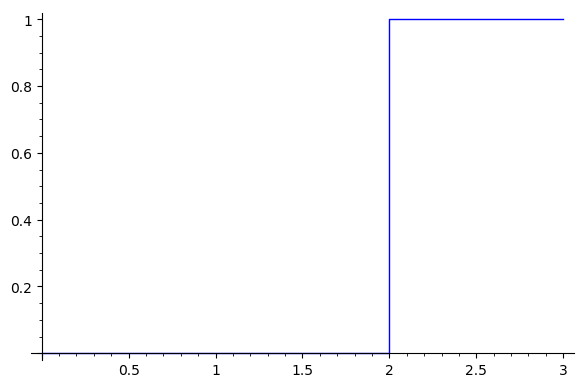

In [5]:
line2d([(0,0),(1,0),(2,0),(2,1),(3,1)])

**Compléter la fonction suivante qui prend en paramètre un chemin et retourne le *plot* du chemin avec `ligne2d`.**

In [6]:
def afficheChemin(chemin):
    """
    Renvoie l'affichage d'un chemin donné par une liste de pas
    INPUT :
        * chemin, une liste de vecteurs pas
    
    OUTPUT : un objet graphique rµeprésentant le chemin
    """ 
    point = [0,0]
    trajectoire = []
    for i in chemin:
        list(i)
        point[0] = point[0] + i[0]
        point[1] = point[1] + i[1]
        trajectoire.append(tuple(point))         
        
    return line2d(trajectoire)

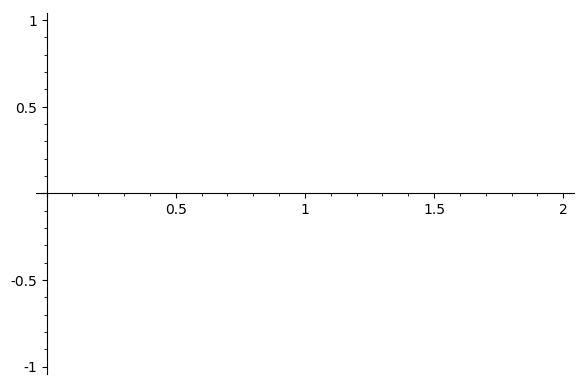

In [7]:
afficheChemin([(1,0)]) # doit afficher un pas unique horizontal

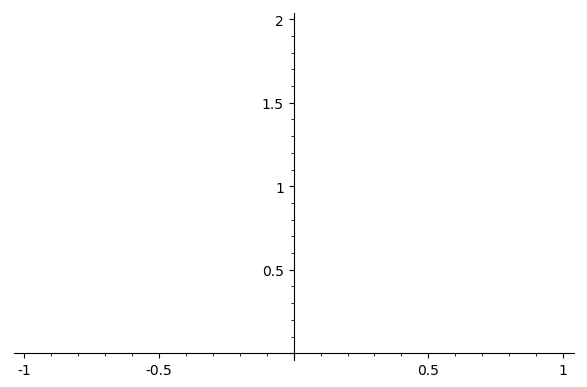

In [8]:
afficheChemin([(0,1)]) # doit afficher un pas unique vertical

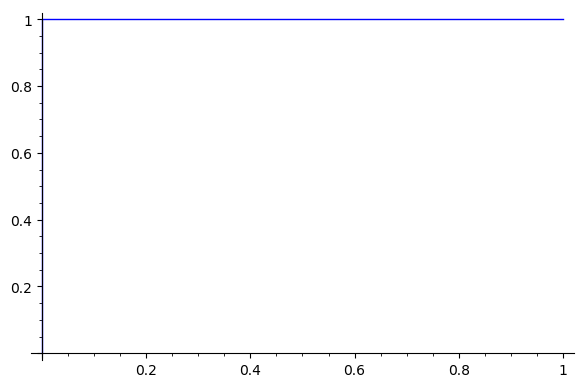

In [9]:
afficheChemin([(0,0),(0,1),(1,0)]) # doit afficher deux pas : un vertical + un horizontal

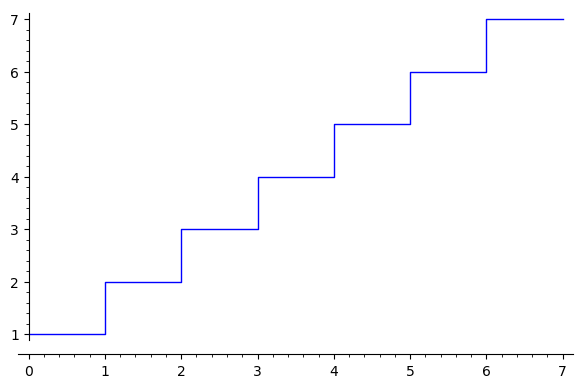

In [10]:
afficheChemin([(0,1), (1,0), (0,1), (1,0), (0,1), (1,0), (0,1), (1,0), (0,1), (1,0), (0,1), (1,0), (0,1), (1,0)]) # doit afficher un escalier

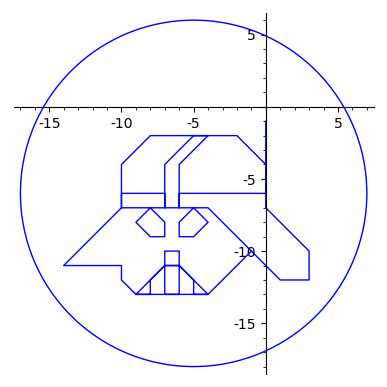

In [11]:
chemin = [(0,-1), (0,-1), (0, -1), (0,-1), (0,-1), (0,-1), (0,-1), (1,-1), (1,-1), (1,-1), (0,-1), (0,-1), (-1,0), (-1,0), (-1,1), (-1,1), (-1,-1), (-1,-1), (-1,-1), (-1,0), (1,0), (-1,1), (0,-1), (-1,0), (0,1), (0,1), (1,-1), (-1,1),(0,1), (-1,0), (0, -1), (1,0),(-1,0), (0,-1), (0,-1), (1,0), (-1,0), (-1,0), (0,1), (1,1), (-1,-1), (-1, -1), (1, 0), (-1,0), (-1,1), (0,1), (-1,0), (-1,0), (-1,0), (-1,0), (1,1), (1,1), (1,1), (1,1), (0,1), (0,1), (0,1), (1,1), (1,1), (1,0), (1,0), (1,0), (-1, -1), (-1, -1), (0,-1), (0,-1), (-1,0), (-1,0), (-1,0), (0,-1), (1,0), (1,0), (-1,-1), (1,-1), (1,0), (0,1), (-1,1), (1,0), (0,1), (0,-1), (1,0), (0,1), (0,1), (0,1), (1,1), (1,1), (-1,0), (1,0), (1,0), (1,0), (1,-1), (1,-1), (0,-1), (0,-1), (-1,0), (-1,0), (-1,0), (-1,0), (-1,0), (-1,0), (0,-1), (1,0), (-1,-1), (0,-1), (1,0), (1,1), (-1,1), (1,0), (1,-1), (1,-1), (1,-1)]
afficheChemin(chemin) + circle((-5,-6), 12) # doit afficher Dark Vador

## Génération de tous les chemins

On dit qu'un chemin est de *taille $n$* s'il contient exactement $n$ pas. Le but de ce TP est d'écrire une fonction qui fabrique la liste de tous les chemins de taille $n$ en "escalier", c'est-à-dire formés des deux pas : $(1,0)$ et $(0,1)$.

Observez les fonctions suivantes :

In [12]:
def chemins0():
    R = []
    R.append([]) # un chemin de taille 0 est une liste vide
    return R
    
def chemins1():
    R = []
    R.append([(1,0)]) # on ajoute les 2 chemins de taille 1 posible
    R.append([(0,1)])
    return R
    
def chemins2():
    R = []
    for chemin in chemins1():
        chemin_a = list(chemin)  # on copie le chemin
        chemin_a.append((1,0)) # on lui ajoute le pas (1,0)
        chemin_b = list(chemin) # on copie le chemin
        chemin_b.append((0,1)) # on lui ajoute le pas (0,1)
        R.append(chemin_a) # on ajoute les deux chemins  au résultat
        R.append(chemin_b)
    return R

In [13]:
chemins2() # la liste des chemins de taille 2

[[(1, 0), (1, 0)], [(1, 0), (0, 1)], [(0, 1), (1, 0)], [(0, 1), (0, 1)]]

In [14]:
len(chemins2()) # il y en a 4

4

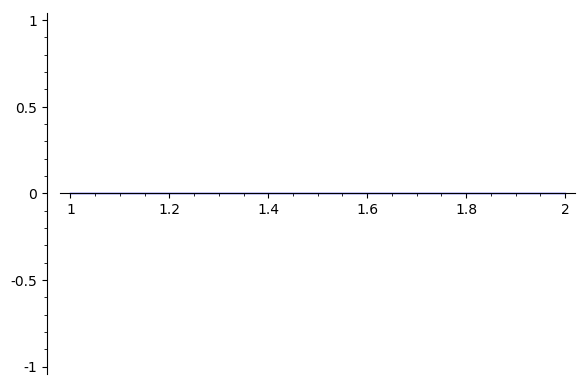

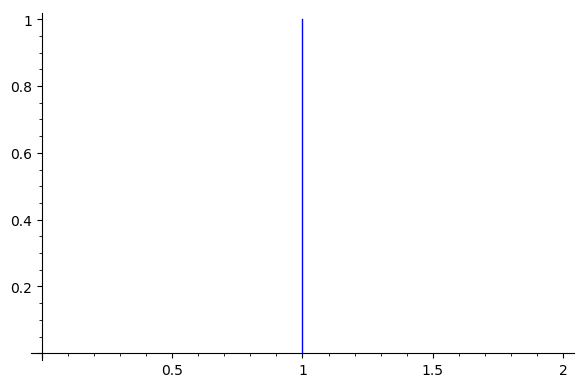

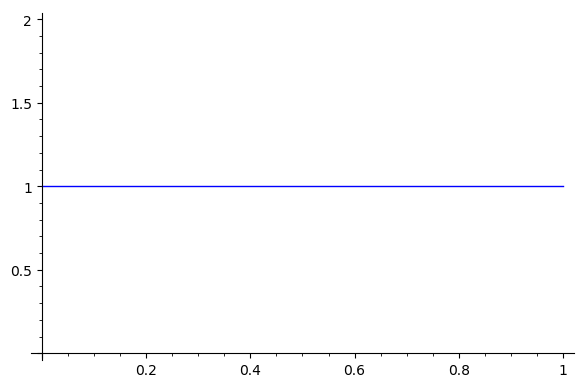

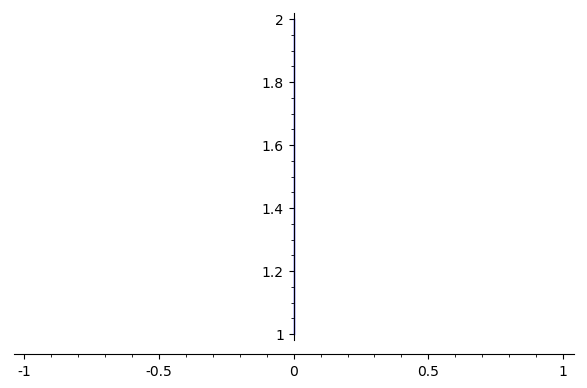

In [15]:
# on peut tous les dessiner
for chemin in chemins2():
    afficheChemin(chemin).show()

**En vous inspirant de la fonction `chemins2`, écrivez une fonction `chemins3` qui renvoie la liste des chemins de taille 3.**

In [16]:
def chemins3():
    """
    Retourne la liste des chemins de taille 3
    """
    R = []
    for chemin in chemins2():
        chemin_a = list(chemin)  # on copie le chemin
        chemin_a.append((1,0)) # on lui ajoute le pas (1,0)
        chemin_b = list(chemin) # on copie le chemin
        chemin_b.append((0,1)) # on lui ajoute le pas (0,1)
        R.append(chemin_a) # on ajoute les deux chemins  au résultat
        R.append(chemin_b)
    return R
    # ecrire le code


In [17]:
len(chemins3())

8

In [18]:
chemins3()

[[(1, 0), (1, 0), (1, 0)],
 [(1, 0), (1, 0), (0, 1)],
 [(1, 0), (0, 1), (1, 0)],
 [(1, 0), (0, 1), (0, 1)],
 [(0, 1), (1, 0), (1, 0)],
 [(0, 1), (1, 0), (0, 1)],
 [(0, 1), (0, 1), (1, 0)],
 [(0, 1), (0, 1), (0, 1)]]

In [19]:
# quelques tests que doit valider votre fonction: si tout va bien, rien ne s'affiche !
R = chemins3()
assert(len(R) == 8)
assert([(1,0),(0,1),(0,1)] in R)

**Sur la même idée, écrivez à présent une fonction `chemins` qui prend en paramètre une taille $n$ et renvoie la liste des chemins de taille $n$.**

Indication :

* Votre fonction ne doit *pas* utiliser les fonctions précédentes (`chemins1`, `chemins2` et `chemins3`).
* Pensez à *séparer* le cas $n=0$ des autres cas.

In [20]:
def chemins(n):
    """
    Retourne la liste des chemins de taille n
    """
    # ecrire le code
    
    R = []
    
    if n == 0:
        return [[]]
    
    elif n == 1:
        R.append([(1,0)]) # on ajoute les 2 chemins de taille 1 posible
        R.append([(0,1)])
        return R
    
    else:
        for chemin in chemins(n-1):
            chemin_a = list(chemin)  # on copie le chemin
            chemin_a.append((1,0)) # on lui ajoute le pas (1,0)
            chemin_b = list(chemin) # on copie le chemin
            chemin_b.append((0,1)) # on lui ajoute le pas (0,1)
            R.append(chemin_a) # on ajoute les deux chemins  au résultat
            R.append(chemin_b)
        
    return R

In [21]:
chemins(3)

[[(1, 0), (1, 0), (1, 0)],
 [(1, 0), (1, 0), (0, 1)],
 [(1, 0), (0, 1), (1, 0)],
 [(1, 0), (0, 1), (0, 1)],
 [(0, 1), (1, 0), (1, 0)],
 [(0, 1), (1, 0), (0, 1)],
 [(0, 1), (0, 1), (1, 0)],
 [(0, 1), (0, 1), (0, 1)]]

In [22]:
# testons la fonction, d'abord le cas 0
assert(chemins(0) == [[]]) # On doit renvoyer une liste contenant le chemin vide 

In [23]:
# maintenant, les chemins avec un peu plus de pas
assert(len(chemins(1)) == 2)
assert(len(chemins(2)) == 4)
C1 = chemins(3)
C2 = chemins3()
C1.sort()
C2.sort()
assert(C1 == C2)
assert(len(chemins(4)) == 16)

Le but est maintenant de compléter la fonction suivante `chemins_end_point` qui doit renvoyer tous les chemins terminant en un point $(a,b)$ du plan (en commençant à $(0,0)$, toujours en utilisant nos deux pas possible. Par exemple, il y a deux chemins qui terminent au point $(1,1)$ :

* `[(0,1), (1,0)]`
* `[(1,0), (0,1)]`

**Compléter la fonction ci-dessous**. Pour vous aider :

* Pas besoin d'utiliser les fonctions précédentes
* Quelles sont les zones du plan que je ne pourrais jamais atteindre ? Si j'appelle ma fonction sur un point non atteignable, que doit-elle renvoyer ?
* Que doit renvoyer ma fonction si je l'appelle sur $(0,0)$ ? 
* Si je cherche les chemins temrinant en $(a,b)$, où finissait mon chemin juste avant le dernier pas ?

In [24]:
def chemins_end_point(a,b):
    R = []
    if b > 0 and a > 0:
        for chemin in chemins_end_point(a-1,b):
            chemin.append((1,0))
            R.append(chemin)
        for chemin in chemins_end_point(a,b-1):
            chemin.append((0,1))
            R.append(chemin)
    elif a > 0:
        for chemin in chemins_end_point(a-1,b):
            chemin.append((1,0))
            R.append(chemin)
    elif b > 0:
        for chemin in chemins_end_point(a,b-1):
            chemin.append((0,1))
            R.append(chemin)
    elif b==a and a==0:
        R = [[]]
    return R

In [25]:
chemins_end_point(1,1)

[[(0, 1), (1, 0)], [(1, 0), (0, 1)]]

In [26]:
# tout d'abord, testons les conditions limites
assert(chemins_end_point(-1,2) == []) # si a < 0, alors il n'y a aucun chemin (liste vide)

In [27]:
assert(chemins_end_point(2,-2) == []) # si b < 0, alors il n'y a aucun chemin (liste vide)

In [28]:
assert(chemins_end_point(0,0) == [[]]) # si a = b = 0, alors il y a 1 unique chemin dans la liste : le chemin vide

In [29]:
# maintenant, testons les chemins avec 1 seul pas
assert(chemins_end_point(1,0) == [[(1,0)]] )
assert(chemins_end_point(0,1) == [[(0,1)]] )

In [30]:
# maintenant, testons les chemins avec plusieurs pas
assert(len(chemins_end_point(1,1)) == 2)
assert(len(chemins_end_point(3,5)) == binomial(8,3))

**Vérifier sur plusieurs valeurs de $a$ et $b$ que le nombre de chemins obtenus est égal à `binomial(a+b,a)`.**

On complique encore un peu les choses : **écrivez à présent une fonction `chemins_up_end_point` qui renvoie un générateur sur les chemins terminant en $(a,b)$ et tel qu'en tout point le chemin soit au dessus de la diagonale, c'est à dire qu'on doit toujours avoir $y \geq x$.**

Indication :

* pas besoin d'utiliser les fonctions précédentes
* c'est *presque* la même chose que la fonction précédente, il suffit de rajouter une condition !

In [35]:
def chemins_up_end_point(a,b):
    """
    Retourne la liste des chemins terminant au point (a,b)
    """
    # ecire le code
    R = []
    if b > 0 and a > 0 and b >= a:
        for chemin in chemins_up_end_point(a-1,b):
            chemin.append((1,0))
            R.append(chemin)
        for chemin in chemins_up_end_point(a,b-1):
            chemin.append((0,1))
            R.append(chemin)
    elif a > 0 and b > a:
        for chemin in chemins_up_end_point(a-1,b):
            chemin.append((1,0))
            R.append(chemin)
    elif b > 0 and b >= a:
        for chemin in chemins_up_end_point(a,b-1):
            chemin.append((0,1))
            R.append(chemin)
    elif b==a and a==0:
        R = [[]]
    return R


In [36]:
chemins_up_end_point(1,1)

[[(0, 1), (1, 0)]]

In [37]:
# testons... D'abord les conditions limites
assert(chemins_up_end_point(-1,0) == [])
assert(chemins_up_end_point(0,-1) == [])
assert(chemins_up_end_point(2,1) == []) # comme 1 < 2, il n'y a aucun chemin vérifiant la condition qui termine en (2,1)

In [38]:
# le cas (0,0) qui doit renvoyer le chemin vide
assert(chemins_up_end_point(0,0) == [[]])

In [39]:
# un cas avec un seul chemin et un seul pas
assert(chemins_up_end_point(0,1) == [[(0,1)]])

In [40]:
# des cas un peu plus gros
assert(len(chemins_up_end_point(3,3)) == 5)
assert(len(chemins_up_end_point(4,4)) == 14)

In [43]:
len(chemins_up_end_point(5,5))

42

**Selon cette contrainte, combien obtenez-vous de chemins qui terminent en (5,5) ?**

*The Ultimate Question of Life, the Universe and Everything*

**Comptez les chemins qui terminent en $(n,n)$ pour $1 \leq n \leq 6$ et cherchez ces nombres sur Google**

Les *Nombres de Catalans* sont des objets classiques de la combinatoire. Parcourez [la page wikipedia](https://fr.wikipedia.org/wiki/Nombre_de_Catalan) et voyez si trouvez dans Sage certains des objets décrits.

Aller plus loin : vous pouvez continuer les expériences sur les chemins en faisant varier les pas possibles et contraintes. Lorsque vous obtenez une suite de nombres, vous pouvez regarder sur le site [OEIS](http://oeis.org/) si elle correspond à des objets combinatoires connus. 